In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Permet de gérer les erreurs qui s'affichent en rose
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Afficher mon dataset en entier
pd.set_option("max_columns", None)
#pd.set_option("max_row", None)

## ANALYSE EXPLORATPOIRE

In [78]:
data = pd.read_csv('dataset.csv', delimiter='\t')

In [79]:
df =data.copy()

In [80]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Description du dataset

ID : Identifiant unique du client
Year_Birth : année de naissance du client
Education : niveau d'éducation du client
Marital_Status : état civil du client
Revenu : Revenu annuel du ménage du client
Kidhome : nombre d'enfants dans le ménage du client
Teenhome : Nombre d'adolescents dans le ménage du client
Dt_Customer : Date d'inscription du client auprès de l'entreprise
Recency : nombre de jours depuis le dernier achat du client
Plainte : 1 si le client s'est plaint au cours des 2 dernières années, 0 sinon


MntWines : Montant dépensé pour le vin au cours des 2 dernières années
MntFruits : Montant dépensé en fruits au cours des 2 dernières années
MntMeatProducts : montant dépensé pour la viande au cours des 2 dernières années
MntFishProducts : montant dépensé pour le poisson au cours des 2 dernières années
MntSweetProducts : montant dépensé en sucreries au cours des 2 dernières années
MntGoldProds : Montant dépensé en or au cours des 2 dernières années


NumDealsPurchases : nombre d'achats effectués avec une remise
AcceptedCmp1 : 1 si le client a accepté l'offre lors de la 1ère campagne, 0 sinon
AcceptedCmp2 : 1 si le client a accepté l'offre lors de la 2ème campagne, 0 sinon
AcceptedCmp3 : 1 si le client a accepté l'offre dans la 3ème campagne, 0 sinon
AcceptedCmp4 : 1 si le client a accepté l'offre lors de la 4ème campagne, 0 sinon
AcceptedCmp5 : 1 si le client a accepté l'offre lors de la 5ème campagne, 0 sinon
Réponse : 1 si le client a accepté l'offre lors de la dernière campagne, 0 sinon


NumWebPurchases : nombre d'achats effectués sur le site Web de l'entreprise
NumCatalogPurchases : Nombre d'achats effectués à  l'aide d'un catalogue
NumStorePurchases : Nombre d'achats effectués directement en magasin
NumWebVisitsMonth : nombre de visites sur le site Web de l'entreprise au cours du dernier mois

In [81]:
# verification de données manquantes en %

(df.isna().sum()/df.shape[0]).sort_values(ascending=False)*100

Income                 1.071429
ID                     0.000000
NumDealsPurchases      0.000000
Z_Revenue              0.000000
Z_CostContact          0.000000
Complain               0.000000
AcceptedCmp2           0.000000
AcceptedCmp1           0.000000
AcceptedCmp5           0.000000
AcceptedCmp4           0.000000
AcceptedCmp3           0.000000
NumWebVisitsMonth      0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumWebPurchases        0.000000
MntGoldProds           0.000000
Year_Birth             0.000000
MntSweetProducts       0.000000
MntFishProducts        0.000000
MntMeatProducts        0.000000
MntFruits              0.000000
MntWines               0.000000
Recency                0.000000
Dt_Customer            0.000000
Teenhome               0.000000
Kidhome                0.000000
Marital_Status         0.000000
Education              0.000000
Response               0.000000
dtype: float64

*     EXPLICATION

Après vérification, je me rends compte que seule la variable 'Income' a 1% de données manquantes. La proportion étant faibles je décide de supprimer les lignes concernées

In [82]:
# suppression des données manquantes
df.dropna(axis=0, inplace=True)

In [83]:
df.shape

(2216, 29)

In [84]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

* Après visualisation de notre dataset, nous nous renndons compte qu'il y a certaines variables qui ne vont pas nous servir dans notre travail de segmentation. Par conséquent, nous décidobns de les retrancher.


In [85]:
# suppression de l'ID client, de Dt_Customer, Z_CostContact, Z_Revenue
df.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True)

In [86]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Classification des variables par catégorie

In [87]:
# verification des donnees qualit
donnees_quali = df.select_dtypes(include="object")

In [88]:
donnees_quali.head()

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married


In [89]:
# verification des donnees quanti
donnees_quanti = df.select_dtypes(include="number")
donnees_quanti.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


* A ce niveau je me rends compte que certaines valeurs encodés 0, 1, 2, 3... ont été classées en variables quantitaves. 
Or ce sont des variables qualitatives. Donc nous décidons de reconstituer notre dataframe en classant chaque variable dans son genre

In [90]:
var_qualit = df[['Education', 'Marital_Status', 'Complain', 'AcceptedCmp1', 'AcceptedCmp2',  'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Kidhome', 'Teenhome']]
var_qualit.head()

,Education,Marital_Status,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Kidhome,Teenhome
0,Graduation,Single,0,0,0,0,0,0,1,0,0
1,Graduation,Single,0,0,0,0,0,0,0,1,1
2,Graduation,Together,0,0,0,0,0,0,0,0,0
3,Graduation,Together,0,0,0,0,0,0,0,1,0
4,PhD,Married,0,0,0,0,0,0,0,1,0


In [91]:
var_quant = df[['Year_Birth','Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
var_quant.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5


* L'année de naissance des clients étant en date, cela ne facilitera pas notre travail futur. Donc nous décidons de la transformer en age

In [92]:
#Fonction de convertion de la variable date en Age
def ageClient(annee):
    import datetime
    date=datetime.date.today()
    year =int(date.strftime("%Y"))
    age=year - annee
    return age

In [93]:
#Creation d'une colonnes Age
var_quant['Age'] = var_quant['Year_Birth'].apply(ageClient)
var_quant.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age
0,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,64
1,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,67
2,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,56
3,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,37
4,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,40


In [94]:
#Supression de la colonne Year_Birth en conservant la colonne Age
var_quant.drop(labels=['Year_Birth'], axis=1,inplace=True)
var_quant.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,64
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,67
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,56
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,37
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,40


In [95]:
#var_quant['Age'].max(), var_quant['Age'].min()

## Visualisation graphique des variables

### 1. Visualisation des variables qualitatives

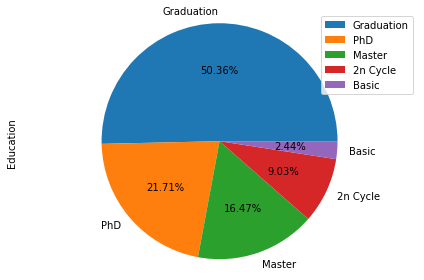

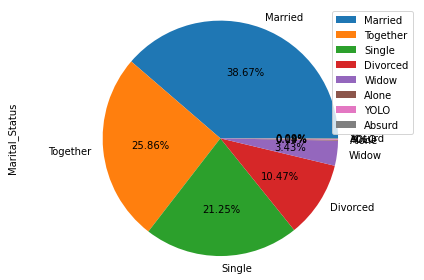

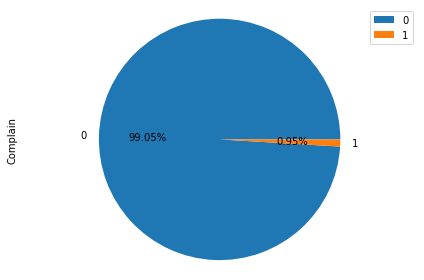

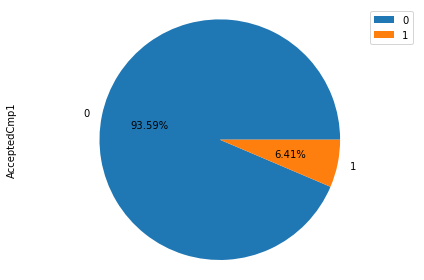

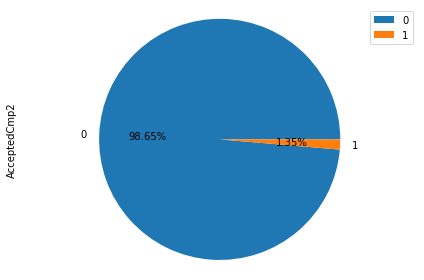

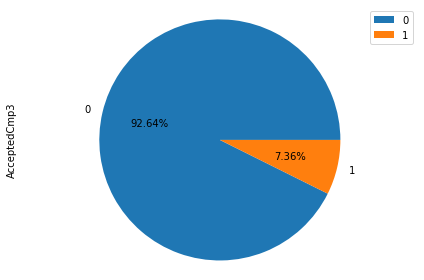

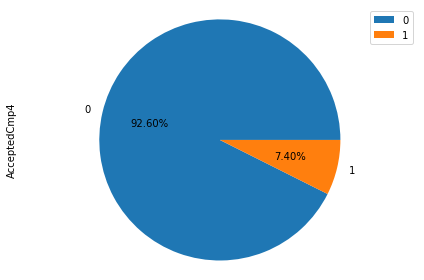

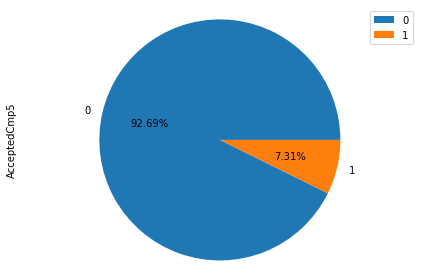

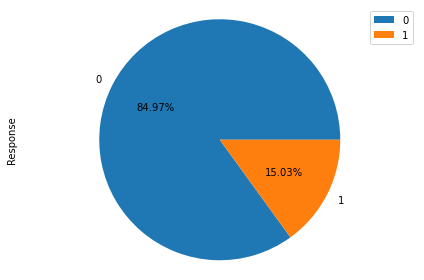

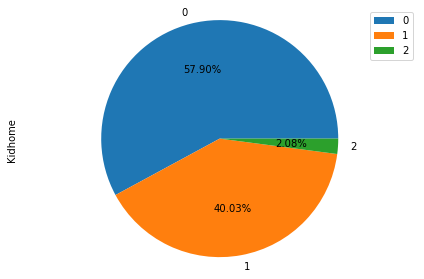

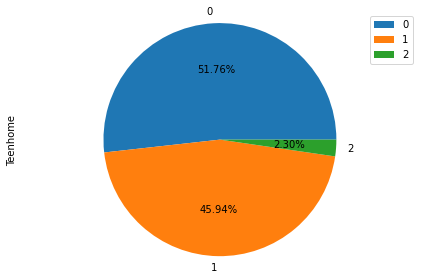

In [96]:
# Viusalisation des variables qualit

for col in var_qualit:
    plt.figure()
    df[col].value_counts().plot.pie(autopct='%1.2f%%')
    plt.axis('equal') 
    plt.legend()
    #plt.title('Distribution de ' + col)
    plt.tight_layout()

#### Explication

*     Au niveau de l'Education, Nos clients sont constitués à 50,36% de personnes ayant le niveau d'étude 'Gradation'
*     Au niveau de la situation matrimoniale, Nos clients sont constitués de 38,67% de personnes mariés
*      Au niveau des plaintes, on note 0.95%, soit un total de 99.05% de personnes satisfaites 
*     les clients ayant accepté l'offre lors de la 1ère campagne sont au nombre de 93.59% contre 6.41%
*     les clients ayant accepté l'offre lors de la 2è campagne sont au nombre de 98.65% contre 13.35%
*     les clients ayant accepté l'offre lors de la 3è campagne sont au nombre de 92.64% contre 7.36%
*     les clients ayant accepté l'offre lors de la 4è campagne sont au nombre de 92.60% contre 7.40%
*     les clients ayant accepté l'offre lors de la 5è campagne sont au nombre de 92.69% contre 7.31%
*     les clients ayant accepté l'offre lors de la dernière campagne sont au nombre de 84.97% contre 15.03%

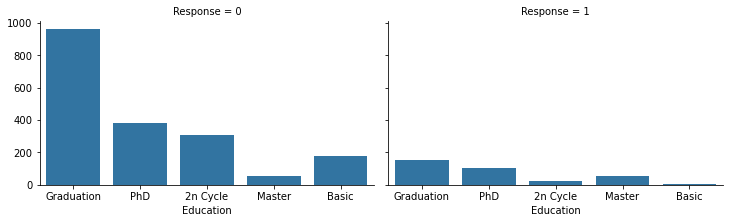

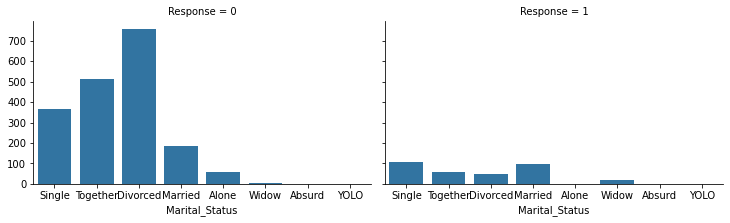

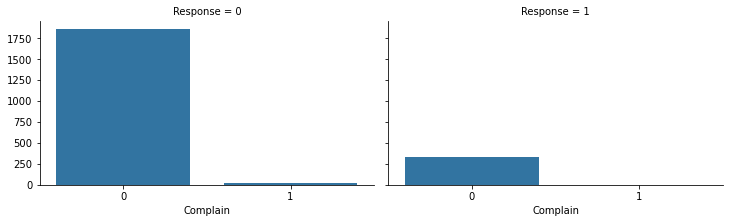

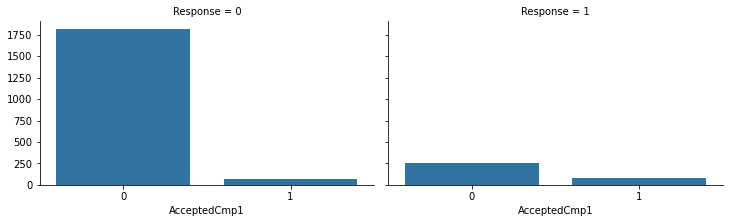

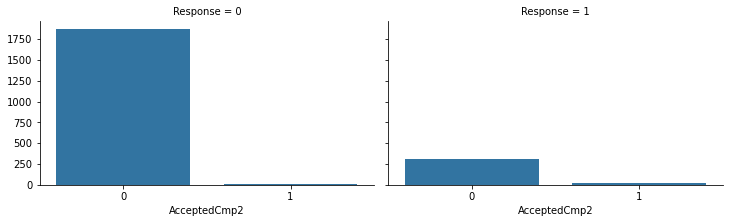

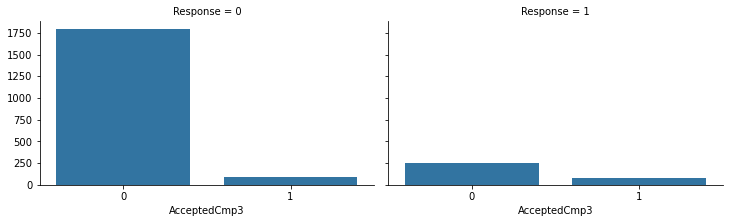

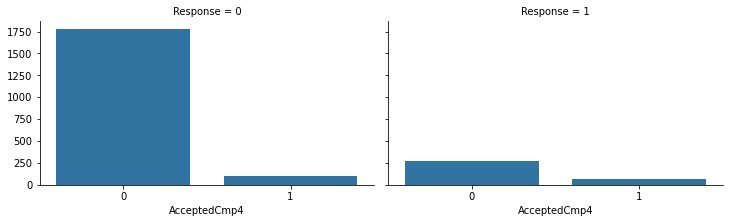

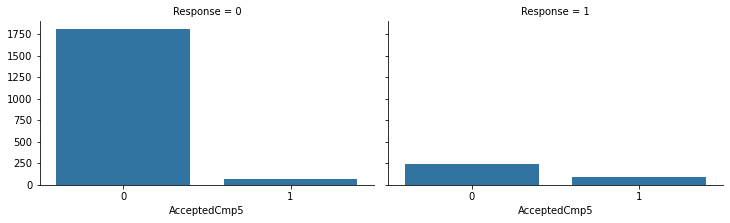

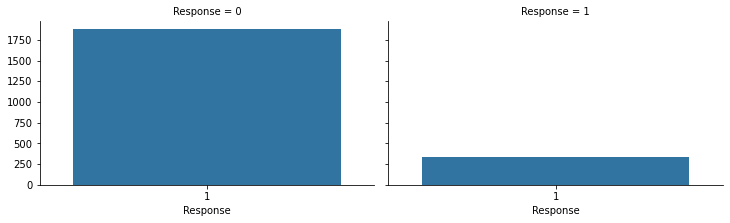

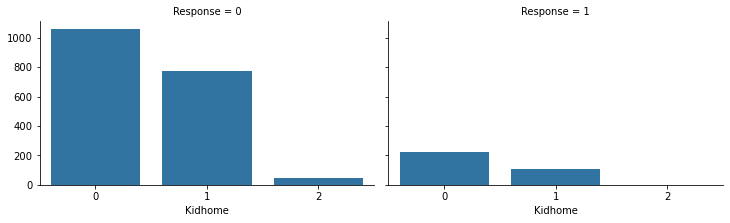

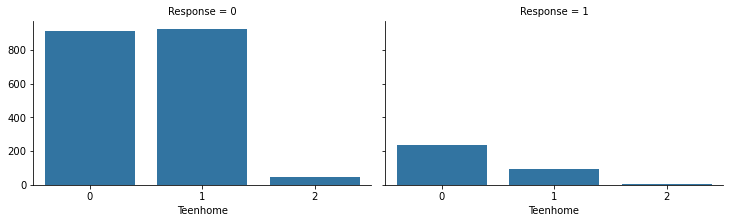

In [97]:
# Visualisons la réponse des clients en fonction des groupes de données qualitatives
for col in var_qualit:
    grid = sns.FacetGrid(df, col='Response', size=3.2, aspect=1.6)
    grid.map(sns.countplot , col)

*    EXPLICATION

### 2. Visualisation des variables quantitatives

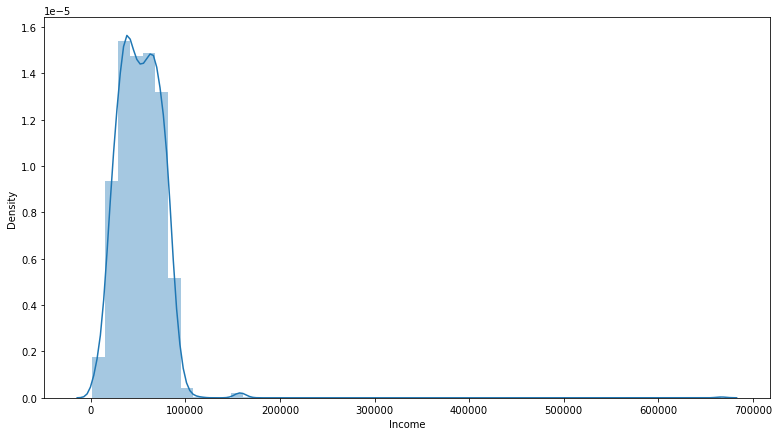

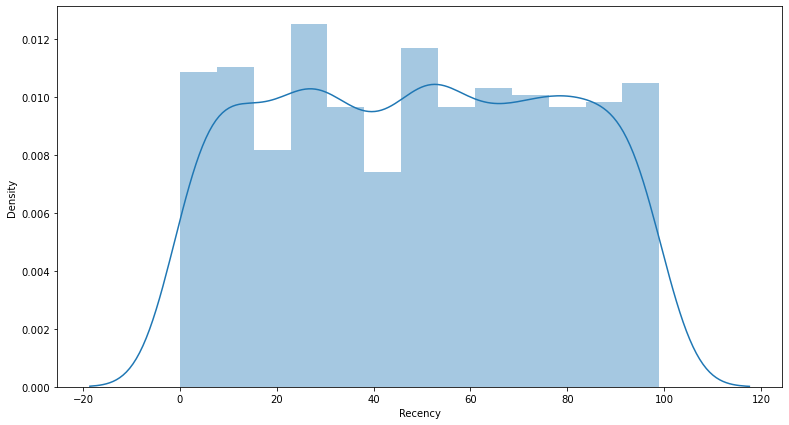

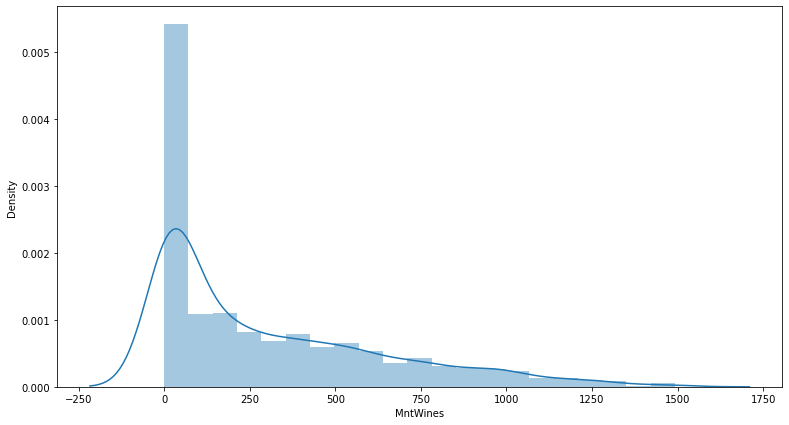

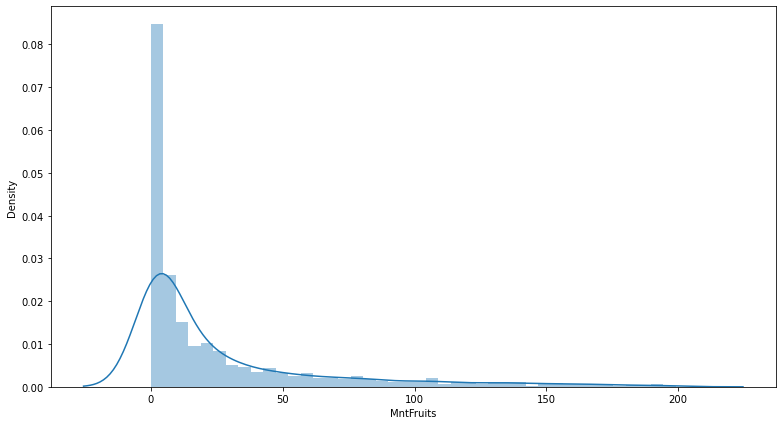

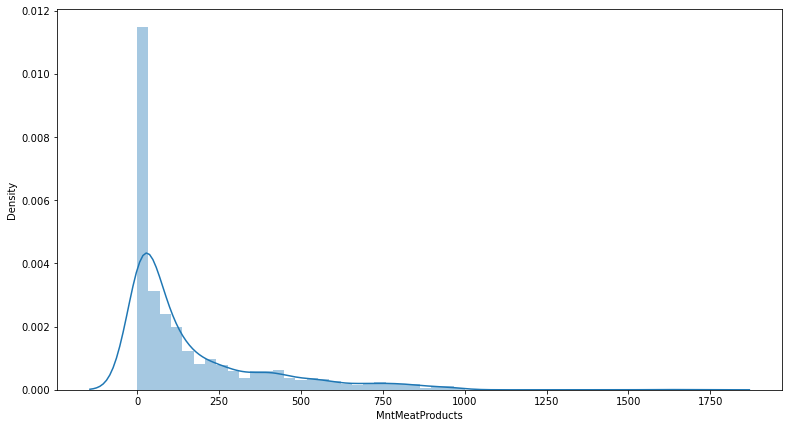

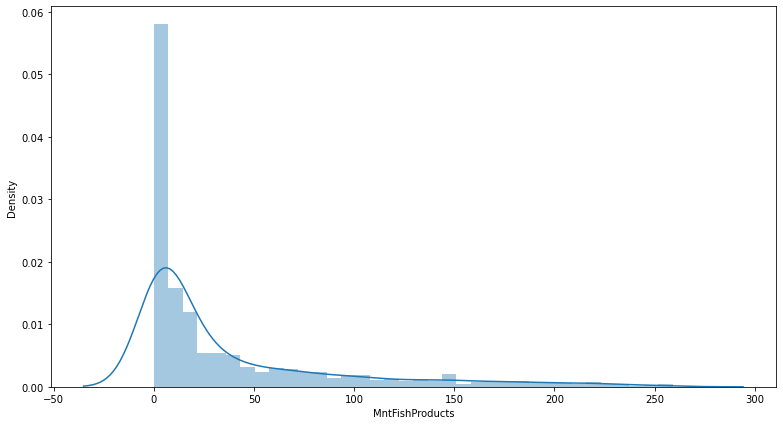

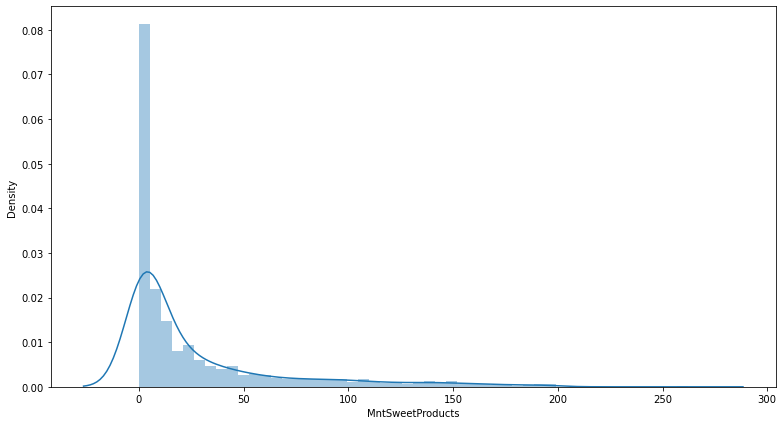

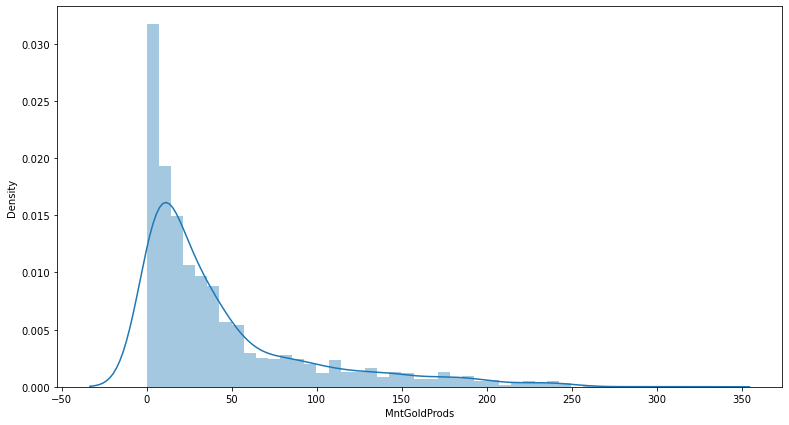

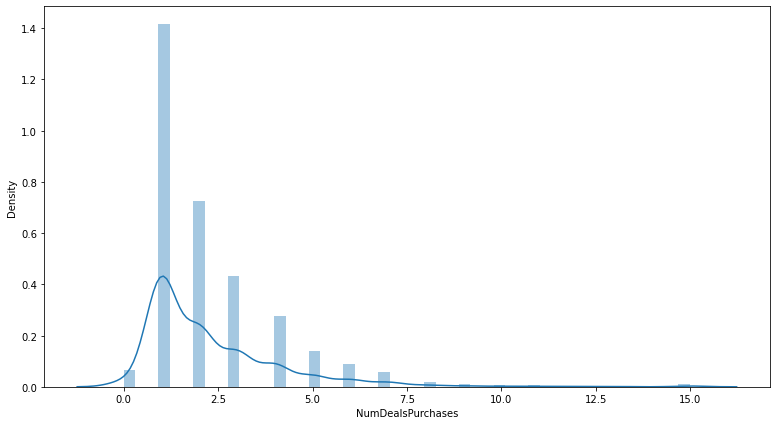

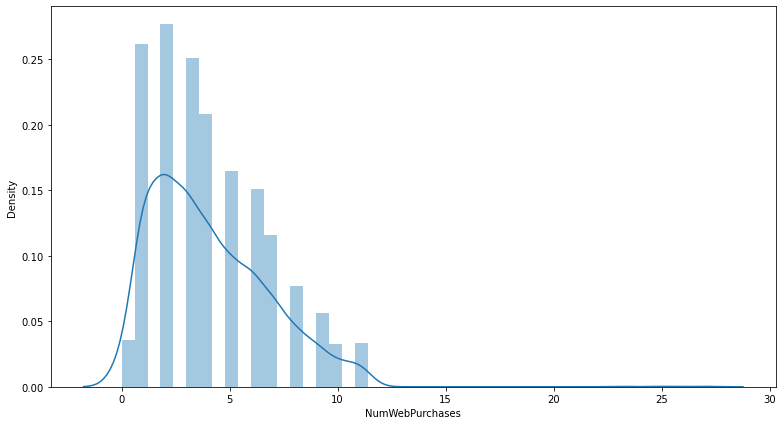

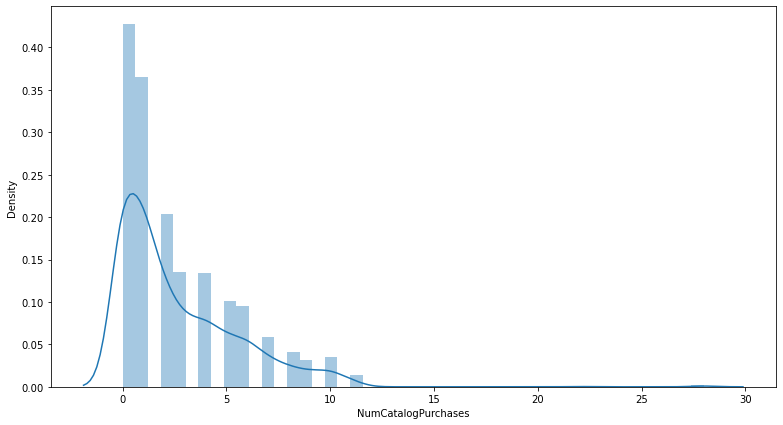

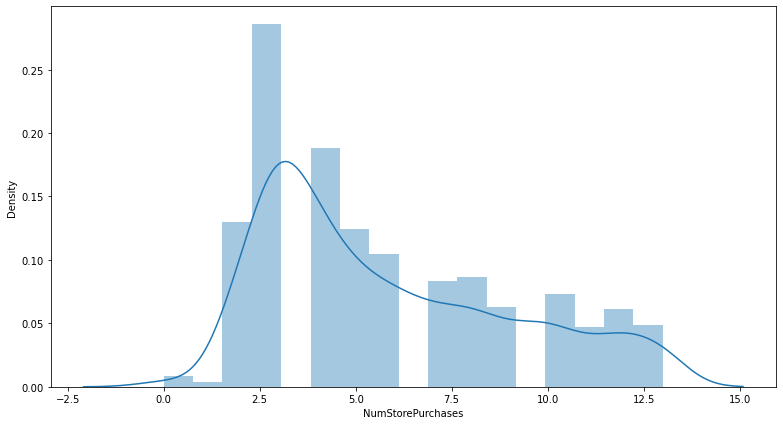

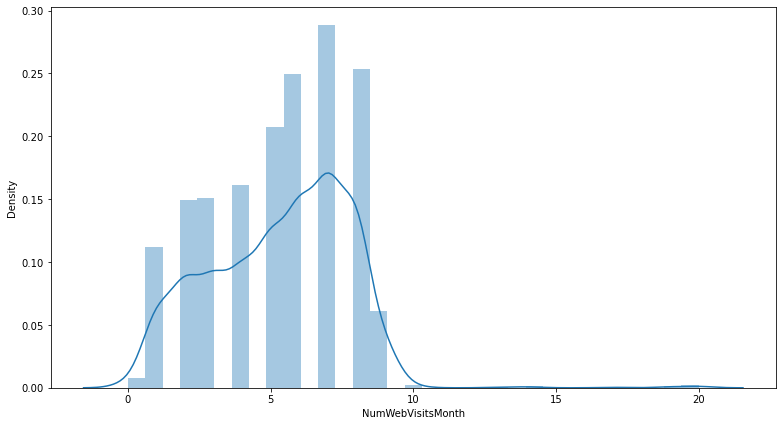

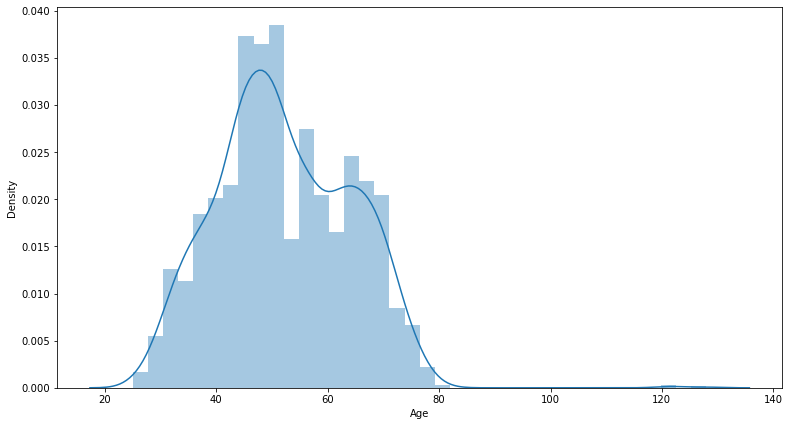

In [98]:
for col in var_quant:
    plt.figure(figsize=(13,7))
    sns.distplot(var_quant[col])

* EXPLICATION 

## Nettoyage & Encodage des variables qualitatives

In [99]:
# Repérons les variables à encoder
var_qualit.select_dtypes(include="object")

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
5,Master,Together
6,Graduation,Divorced
7,PhD,Married
8,PhD,Together
9,PhD,Together


In [100]:
var_qualit.columns

Index(['Education', 'Marital_Status', 'Complain', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Response', 'Kidhome', 'Teenhome'],
      dtype='object')

In [101]:
var_qualit['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [102]:
var_qualit['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

### Encodage des variables qualitatives

In [103]:
# Encodage de la variable 'Education'

def encodage(var_qualit):
    code = {'Basic':0,
            '2n Cycle':1,
            'Graduation':2,
            'Master':3,
            'PhD':4,
            'Married':0,
            'Together':1,
            'Single' : 2,
            'Divorced' : 3,
            'Widow' :4,
            'Alone':5,
            'YOLO' :6,
            'Absurd':7           
            
            }
    #var = ['Education']
    for col in var_qualit.select_dtypes('object'):
        var_qualit[col] = var_qualit[col].map(code)
        
    return var_qualit


In [104]:
encodage(var_qualit)

,Education,Marital_Status,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Kidhome,Teenhome
0,2,2,0,0,0,0,0,0,1,0,0
1,2,2,0,0,0,0,0,0,0,1,1
2,2,1,0,0,0,0,0,0,0,0,0
3,2,1,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,1,0
5,3,1,0,0,0,0,0,0,0,0,1
6,2,3,0,0,0,0,0,0,0,0,1
7,4,0,0,0,0,0,0,0,0,1,0
8,4,1,0,0,0,0,0,0,1,1,0
9,4,1,0,0,0,1,0,0,0,1,1


* Les variables quantitatives étant définies sur des échelles différentes, nous décidons de les normaliser afin de faciliter notre étude

### Normalisation des variables quantitatvies

In [105]:
var_quant.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,64
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,67
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,56
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,37
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,40


In [106]:
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(var_quant), columns = var_quant.columns)

In [107]:
scaled_features.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age
0,0.234063,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.986443
1,-0.234559,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,1.236801
2,0.769478,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.318822
3,-1.017239,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-1.266777
4,0.240221,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-1.016420


In [108]:
var_quant=scaled_features
var_quant.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age
0,0.234063,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.986443
1,-0.234559,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,1.236801
2,0.769478,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.318822
3,-1.017239,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-1.266777
4,0.240221,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-1.016420


In [113]:
var_qualit.shape

(2216, 11)

In [114]:
(var_quant.isna().sum()/var_quant.shape[0]).sort_values(ascending=False)*100
var_quant.shape

(2216, 14)

In [115]:
(var_qualit.isna().sum()/var_qualit.shape[0]).sort_values(ascending=False)*100

Education         0.0
Marital_Status    0.0
Complain          0.0
AcceptedCmp1      0.0
AcceptedCmp2      0.0
AcceptedCmp3      0.0
AcceptedCmp4      0.0
AcceptedCmp5      0.0
Response          0.0
Kidhome           0.0
Teenhome          0.0
dtype: float64

* Après le nettoyage des données, nous décidons de croiser les 2 DataFrames

In [116]:
#df2 = pd.DataFrame([var_quant,var_qualit])
dfNew = pd.concat([var_quant,var_qualit], axis=1, ignore_index=False)
dfNew.shape

(2239, 25)

In [117]:
print('Nombre de ligne:', dfNew.shape[0])
print('Nombre de colonne:',dfNew.shape[1])

Nombre de ligne: 2239
Nombre de colonne: 25


In [118]:
(dfNew.isna().sum()/dfNew.shape[0]).sort_values(ascending=False)*100

Income                 1.027244
Age                    1.027244
Kidhome                1.027244
Response               1.027244
AcceptedCmp5           1.027244
AcceptedCmp4           1.027244
AcceptedCmp3           1.027244
AcceptedCmp2           1.027244
AcceptedCmp1           1.027244
Complain               1.027244
Marital_Status         1.027244
Education              1.027244
NumWebVisitsMonth      1.027244
Recency                1.027244
NumStorePurchases      1.027244
NumCatalogPurchases    1.027244
NumWebPurchases        1.027244
NumDealsPurchases      1.027244
MntGoldProds           1.027244
MntSweetProducts       1.027244
MntFishProducts        1.027244
MntMeatProducts        1.027244
MntFruits              1.027244
MntWines               1.027244
Teenhome               1.027244
dtype: float64

In [119]:
dfNew.dropna(axis=0, inplace=True)

In [120]:
print('Nombre de ligne:', dfNew.shape[0])
print('Nombre de colonne:',dfNew.shape[1])

Nombre de ligne: 2193
Nombre de colonne: 25


# LA SEGMENTATION CLIENT

In [122]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Inertia')

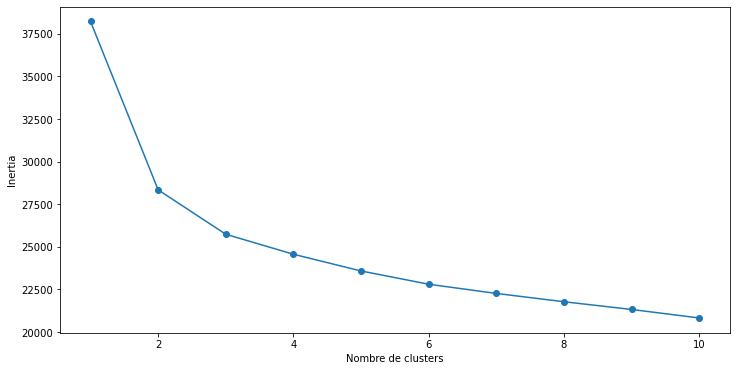

In [123]:
SSE = []

for cluster in range(1,11):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(dfNew)
    SSE.append(kmeans.inertia_)

# convertir les résultats en une base de données et les tracer

frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertia')

### Calculons le score de silhouette du modèle que nous venons de construire :

In [124]:
from sklearn.metrics import silhouette_score

In [127]:
# First, build a model with 4 clusters

kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(dfNew)

# Maintenant, imprimons le score de silhouette de ce modèle

print('le score de silhouette de ce modèle est :', silhouette_score(dfNew, kmeans.labels_, metric='euclidean'))

le score de silhouette de ce modèle est : 0.11121845130474682


* Le score obtenu visualisons les clusters que nous venons de créer pour avoir une idée de l'efficacité du modèle :

In [129]:
dfNew.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Education,Marital_Status,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Kidhome,Teenhome
0,0.234063,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.986443,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.234559,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,1.236801,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.769478,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.318822,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.017239,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-1.266777,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.240221,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-1.016420,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


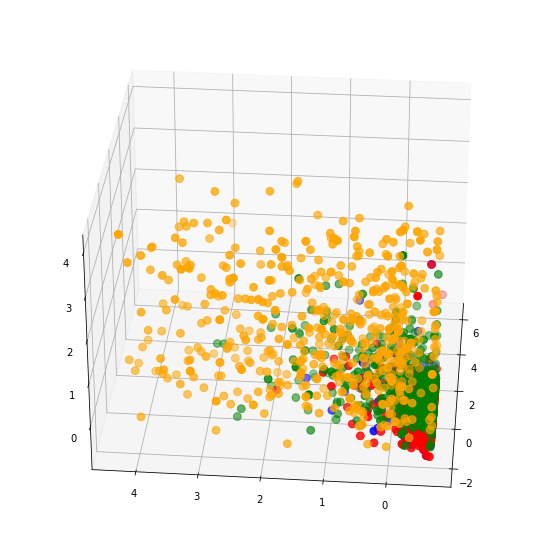

In [136]:
clusters = kmeans.fit_predict(dfNew.iloc[:,1:])
dfNew["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfNew.Age[dfNew.label == 0], dfNew["MntFruits"][dfNew.label == 0], dfNew["MntFishProducts"][dfNew.label == 0], c='blue', s=60)
ax.scatter(dfNew.Age[dfNew.label == 1], dfNew["MntFruits"][dfNew.label == 1], dfNew["MntFishProducts"][dfNew.label == 1], c='red', s=60)
ax.scatter(dfNew.Age[dfNew.label == 2], dfNew["MntFruits"][dfNew.label == 2], dfNew["MntFishProducts"][dfNew.label == 2], c='green', s=60)
ax.scatter(dfNew.Age[dfNew.label == 3], dfNew["MntFruits"][dfNew.label == 3], dfNew["MntFishProducts"][dfNew.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()